# Packages

In [8]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

# Dataset

In [9]:
x, y = load_coffee_data()

In [10]:
print(f'Shape of x: {x.shape}')
print(f"x[0-5]:\n {x[0:5]}")
print(f'Shape of y: {y.shape}')
print(f"y[0-5]:\n {y[0:5]}")

Shape of x: (200, 2)
x[0-5]:
 [[185.32  12.69]
 [259.92  11.87]
 [231.01  14.41]
 [175.37  11.72]
 [187.12  14.13]]
Shape of y: (200, 1)
y[0-5]:
 [[1.]
 [0.]
 [0.]
 [0.]
 [1.]]


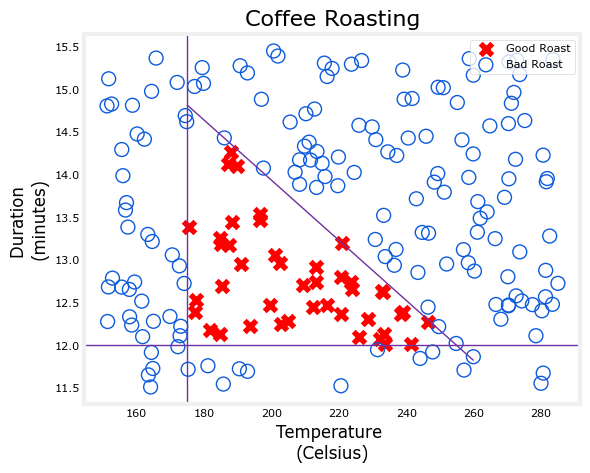

In [11]:
plt_roast(x, y)

In [12]:
# Normalise data
# 1. create normalize layer
norm_layer = tf.keras.layers.Normalization(axis=-1)

# 2. Adapt the data --> learns mean, variance
norm_layer.adapt(x)

# 3. normlizetion
xn = norm_layer(x)
print(f"Temperature Max, Min post normalization: {np.max(xn[:,0]):0.2f}, {np.min(xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(xn[:,1]):0.2f}, {np.min(xn[:,1]):0.2f}")

Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


In [13]:
xt = np.tile(xn, (1000, 1))
yt = np.tile(y, (1000, 1))
print(xt.shape, yt.shape)

(200000, 2) (200000, 1)


# Tensorflow model

In [40]:
model = Sequential([
    tf.keras.Input(shape=2),
    Dense(3, activation='sigmoid', name='layer1'),
    Dense(1, activation='sigmoid', name='layer2')
])

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [42]:
w1, b1 = model.get_layer('layer1').get_weights()
w2, b2 = model.get_layer('layer2').get_weights()
print(f"W1{w1.shape}:\n", w1, f"\nb1{b1.shape}:", b1)
print(f"W2{w2.shape}:\n", w2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[-0.09 -0.89  0.93]
 [ 0.12  0.02  0.54]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[-0.83]
 [-1.21]
 [-1.  ]] 
b2(1,): [0.]


In [43]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01))

model.fit(xt, yt, epochs=10)

Epoch 1/10
6250/6250 [==============================] - 5s 783us/step - loss: 0.1687
Epoch 2/10
6250/6250 [==============================] - 5s 798us/step - loss: 0.1205
Epoch 3/10
6250/6250 [==============================] - 5s 803us/step - loss: 0.0616
Epoch 4/10
6250/6250 [==============================] - 5s 780us/step - loss: 0.0181
Epoch 5/10
6250/6250 [==============================] - 5s 829us/step - loss: 0.0114
Epoch 6/10
6250/6250 [==============================] - 5s 831us/step - loss: 0.0079
Epoch 7/10
6250/6250 [==============================] - 5s 792us/step - loss: 0.0056
Epoch 8/10
6250/6250 [==============================] - 5s 797us/step - loss: 0.0040
Epoch 9/10
6250/6250 [==============================] - 6s 896us/step - loss: 0.0029
Epoch 10/10
6250/6250 [==============================] - 6s 889us/step - loss: 0.0021


In [59]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[ 14.12 -10.95  -0.1 ]
 [ 11.81  -0.23  -8.87]] 
b1: [  1.67 -11.99 -11.03]
W2:
 [[-42.8 ]
 [-49.25]
 [-44.99]] 
b2: [25.59]


In [60]:
x_test = np.array([
    [200, 13.9],
    [200, 17]
])

x_testn = norm_layer(x_test)
predictions = model.predict(x_testn)
print(f'prediction of test\n: {predictions}')

prediction of test
: [[9.87e-01]
 [3.25e-08]]


# Layer functions

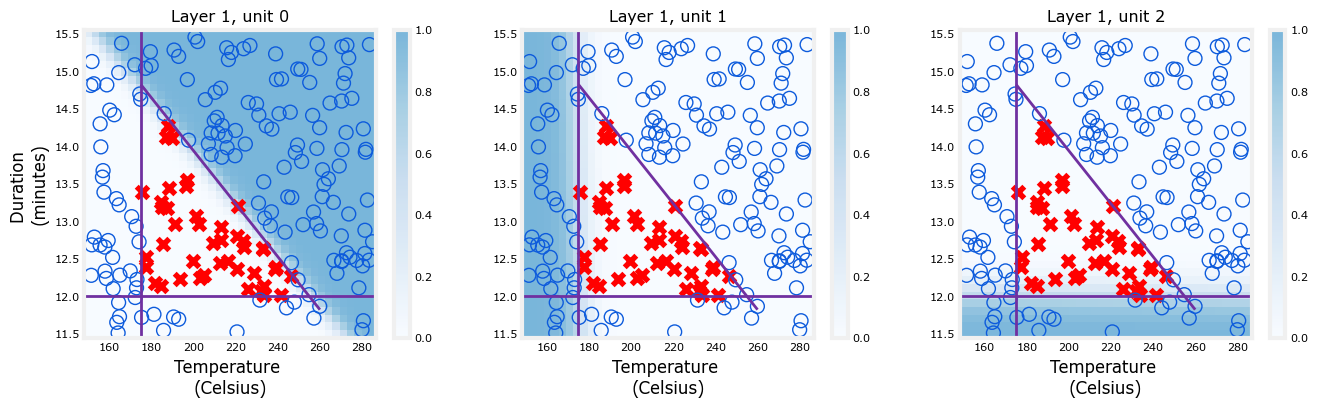

In [61]:
plt_layer(x, y.reshape(-1,), W1, b1, norm_layer)

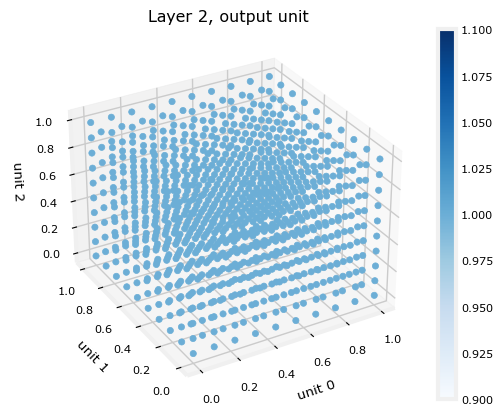

In [62]:
plt_output_unit(w2, b2)

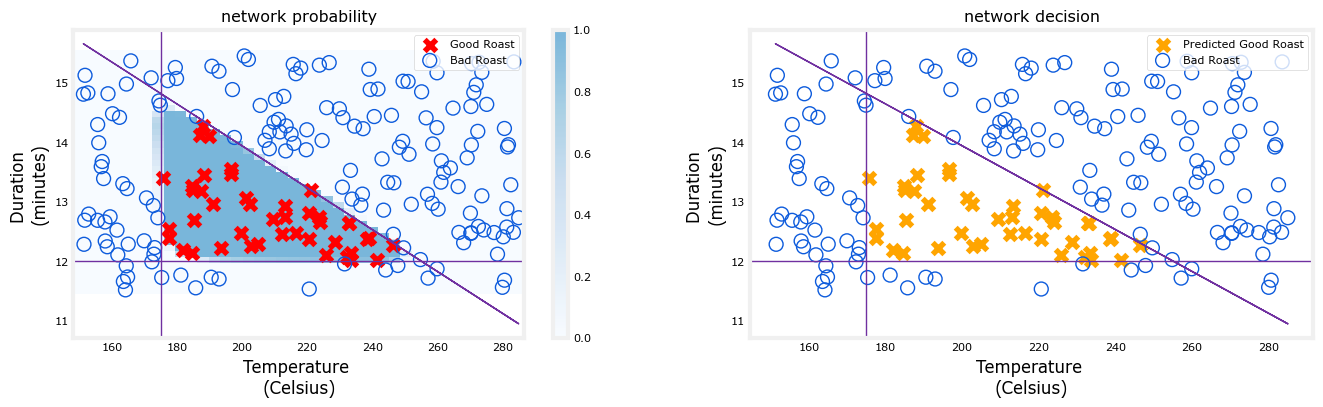

In [65]:
netf= lambda x : model.predict(norm_layer(x))
plt_network(x,y,netf)